# Pandas Visualization

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas usa o maplotlib por baixo e fornece algumas funções para visualização dos dados. Antes de mergulharmos na visualização com Pandas, vamos falar um pouco sobre `matplotlib's style package`
Matplotlib vem com o número de estilos predefinidos, o qual podemos escolher para mudar o estilo dos nossos plots. Podemos usar plt.style.available para ver os estilos disponíveis.

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Vamos utilizar o estilo seaborn-colorblind

In [8]:
plt.style.use('seaborn-colorblind')

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_11776\1159425588.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


### DataFrame.plot

A visualização de dados no Pandas é útil para plotarmos séries de um jeito rápido e fácil.

Vamos criar um Dataframe.

In [14]:
np.random.seed(123)

df = pd.DataFrameb({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


Agora, vamos ver como esses dados são. Podemos utilizar o método plot do DataFrame.

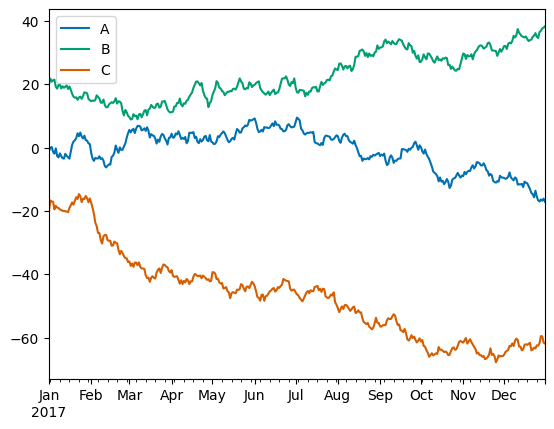

In [18]:
df.plot();

Observe como as cores são ligeiramente diferentes das cores padrão do matplotlib por causa do estilo que usamos.

DataFrame.plot nos permite traçar vários tipos diferentes de plotagens. Podemos selecionar qual gráfico queremos usar utilizando o parâmetro kind.

Vamos tentar criar um gráfico de dispersão que leva as colunas A e B de df.

Passamos scatter para o parâmetro kind para alterar o tipo de plotagem.

Isso é o que obteríamos se chamassemos plt.plot nas colunas A e B com o parâmetro marcador de ponto.

Passar scatter para o argumento kind muda o gráfico para um gráfico de dispersão. Você também pode escolher o tipo de gráfico usando os métodos dataframe.plot.kind em vez de fornecer o argumento de palavra-chave kind.

<AxesSubplot: xlabel='A', ylabel='B'>

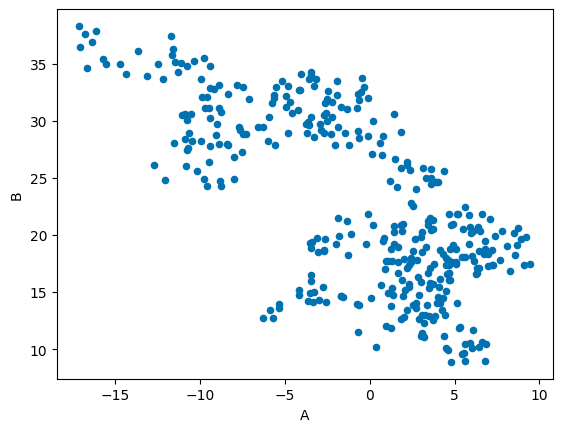

In [24]:
df.plot('A','B',kind='scatter')
# df.plot.scatter("A","B")
# plt.scatter(df['A'],df['B'])

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'a
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

Vamos criar um scatterplot com pontos variando em cor e tamanho

<AxesSubplot: xlabel='A', ylabel='C'>

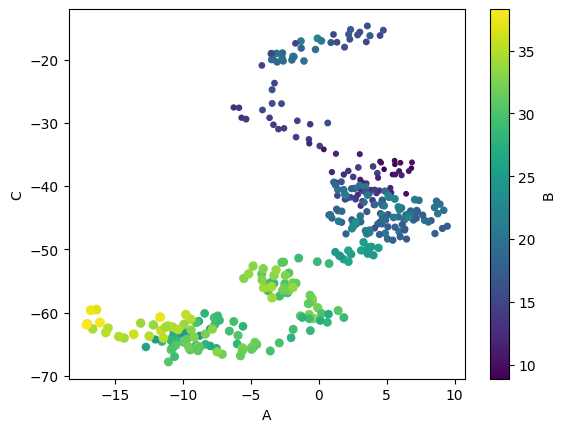

In [30]:
df.plot.scatter('A','C',c='B',s=df['B'],colormap='viridis')

Aqui podemos ver as colunas A e C plotadas uma contra a outra com o tamanho e a cor mudando com base nos valores da coluna B. Como df.plot.scatter retorna um matplotlib.axes._subplot, podemos realizar modificações nesse objeto da mesma forma que os objetos retornados pelos gráficos de matplotlib.

Por exemplo, definir a proporção como 'equal' permite que o visualizador veja facilmente que o intervalo da série A é muito menor do que a série C.

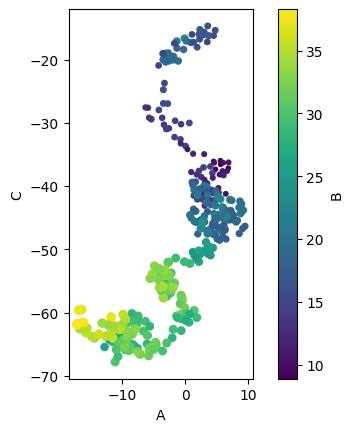

In [33]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

Usando pandas, também podemos facilmente fazer gráficos de caixa, histogramas e gráficos de estimativa de densidade de kernel. Que são úteis para visualizar uma estimativa da função de densidade de probabilidade de uma variável. Os gráficos de estimativa de densidade do kernel são úteis em aplicações de ciência de dados em que você deseja derivar uma função contínua suave de uma determinada amostra.

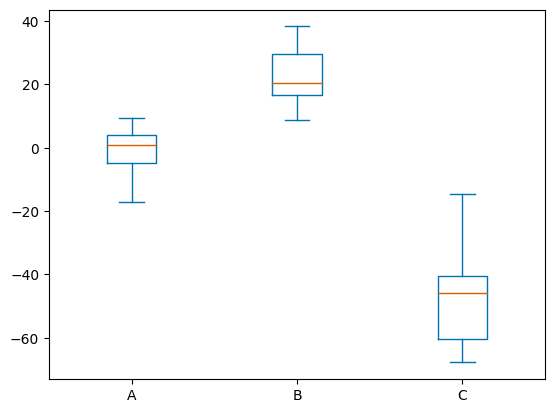

In [34]:
df.plot.box();

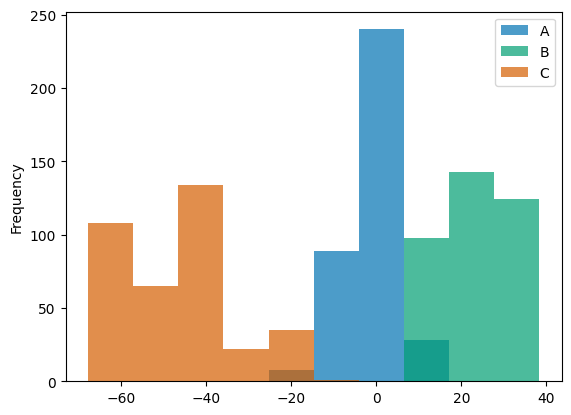

In [37]:
df.plot.hist(alpha=0.7);

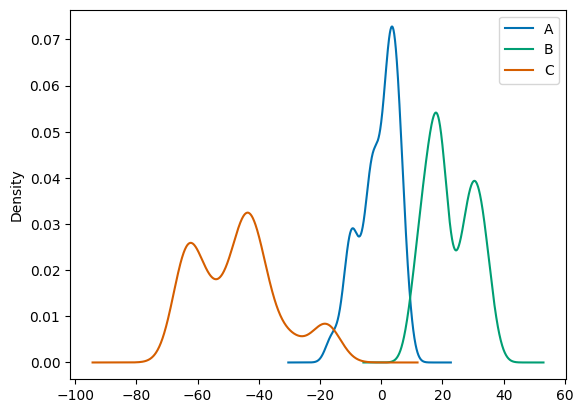

In [38]:
df.plot.kde();

### pandas.tools.plotting

In [41]:
iris = pd.read_csv('../assets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Uma matriz de dispersão (scatter matrix) é uma maneira de comparar cada coluna em um DataFrame com todas as outras colunas de maneira pareada. Vamos usá-lo para visualizar o dataframe da íris e ver quais insights podemos obter de nossos dados.

A matriz de dispersão cria gráficos de dispersão entre as diferentes variáveis e histogramas ao longo das diagonais.

Isso nos permite ver rapidamente alguns dos padrões mais óbvios no conjunto de dados.

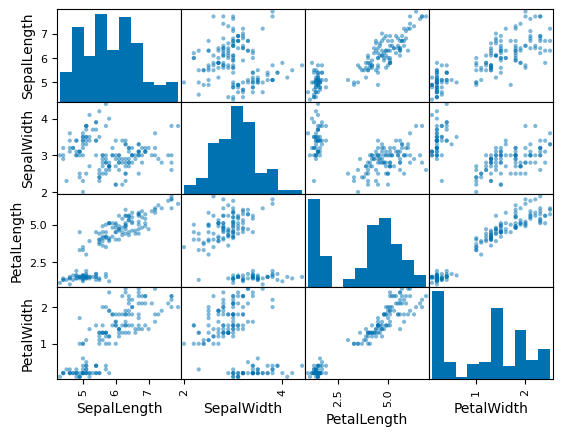

In [55]:
pd.plotting.scatter_matrix(iris);

Olhando para os gráficos de dispersão, parece que existem alguns agrupamentos distintos dos pontos, o que pode indicar que pode haver algum agrupamento acontecendo.

Vejamos mais uma ferramenta de plotagem em pandas que nos ajudará a visualizar dados multivariados. Pandas inclui uma ferramenta de plotagem para criar plotagens de coordenadas paralelas.

In [59]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


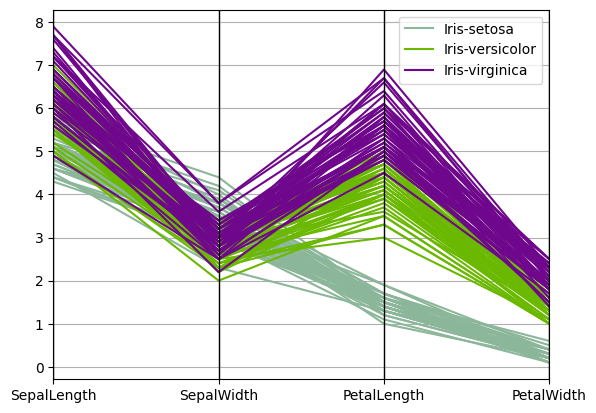

In [58]:
# plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

Gráficos de coordenadas paralelas são uma maneira comum de visualizar dados multivariados de alta dimensão.

Cada variável no conjunto de dados corresponde a uma linha vertical paralela igualmente espaçada. Os valores de cada variável são então conectados por linhas entre cada observação individual.

Colorir as linhas por classe, neste exemplo a espécie de flor, permite ao observador ver mais facilmente qualquer padrão ou agrupamento.

Por exemplo, olhando para o nosso conjunto de dados de íris, podemos ver que o comprimento da pétala e a largura da pétala são duas variáveis que dividem as diferentes espécies de forma bastante clara. Com a íris virginica tendo as pétalas mais longas e largas. E a íris setosa possuindo as pétalas mais curtas e estreitas. Bem, é isso para visualização em pandas.
